<a href="https://colab.research.google.com/github/GattazSouza/Previs-o_clientes/blob/main/Previs%C3%A3o_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
streaming = pd.read_csv('/content/streaming_data.csv')

In [ ]:
print('-------------------Dataset-------------------\n')
display(streaming.head())
print('-------------------Data shape-------------------\n')
display(streaming.shape)

-------------------Dataset-------------------



,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


-------------------Data shape-------------------



(77884, 10)

In [ ]:
print('--------------------Data description----------------------------\n')
display(streaming.describe().T)
print('--------------------Data Types----------------------------------\n')
display(streaming.dtypes)
print('--------------------NA Check-------------------------------\n')
display(streaming.isna().sum())

--------------------Data description----------------------------



,count,mean,std,min,25%,50%,75%,max
Age,66607.0,43.511072,15.043158,18.0,30.00,43.00,57.0,69.0
Time_on_platform,56464.0,4385.848505,2526.580859,0.0,2196.00,4384.00,6573.0,8759.0
Devices_connected,52696.0,2.995370,1.414072,1.0,2.00,3.00,4.0,5.0
Num_streaming_services,9572.0,2.496239,1.120700,1.0,1.00,2.00,4.0,4.0
Num_active_profiles,77884.0,3.002273,1.413235,1.0,2.00,3.00,4.0,5.0
Avg_rating,60614.0,3.002252,1.154963,1.0,1.99,3.01,4.0,5.0
Churned,61148.0,0.243066,0.428938,0.0,0.00,0.00,0.0,1.0


--------------------Data Types----------------------------------



,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


--------------------NA Check-------------------------------



,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


--------------------Valores nulos-----------------------



,0
Age,14.479226
Gender,18.637974
Time_on_platform,27.502440
Devices_connected,32.340404
Subscription_type,32.382774
Num_streaming_services,87.709928
Num_active_profiles,0.000000
Avg_rating,22.174002
Churned,21.488367
User_id,0.000000


--------------------Proporção de Valores nulos-----------------



Text(0.5, 1.0, 'Quantidade de dados faltantes')

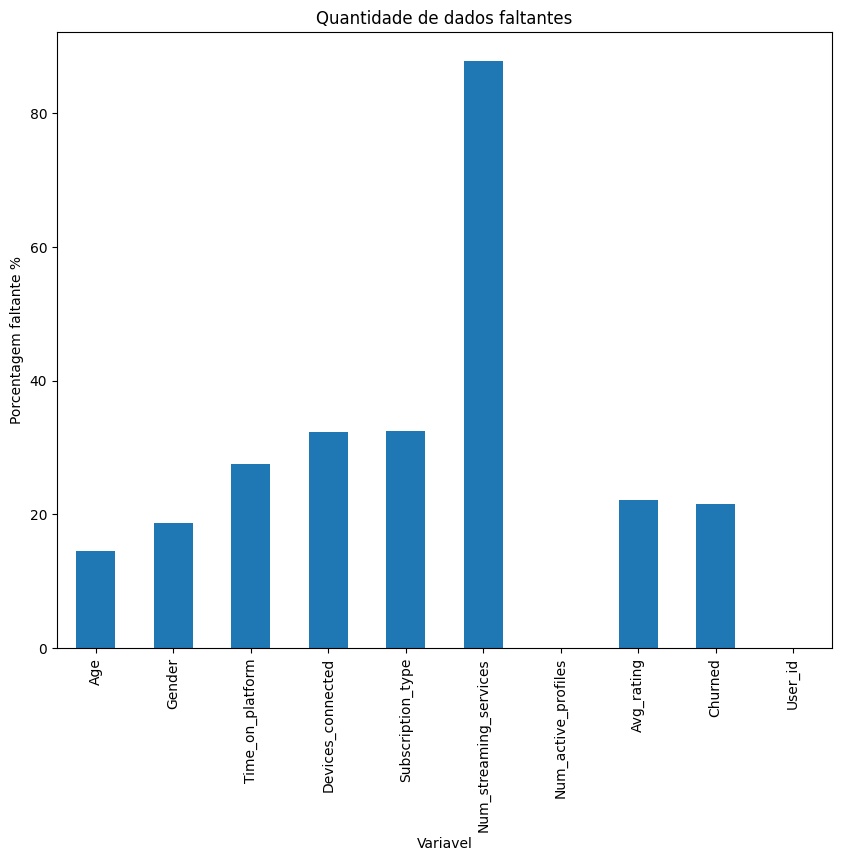

In [ ]:
#Proporção de valores nulos
print('--------------------Valores nulos-----------------------\n')
display(streaming.isnull().mean()*100)
print('--------------------Proporção de Valores nulos-----------------\n')
(streaming.isnull().mean()*100).plot.bar(figsize=(10,8))
plt.ylabel('Porcentagem faltante %')
plt.xlabel('Variavel')
plt.title('Quantidade de dados faltantes')

In [ ]:
#Classificação de assinatura
print('--------------------Assinaturas-----------------------\n')
streaming_calc = streaming.groupby('Subscription_type')['User_id'].count().reset_index()
streaming_calc = pd.DataFrame(streaming_calc)
streaming_calc

--------------------Assinaturas-----------------------



,Subscription_type,User_id
0,Basic,17527
1,Premium,17625
2,Standard,17511


--------------------Quantidade de assinaturas-----------------



Text(0.5, 1.0, 'Tipos de assinaturas')

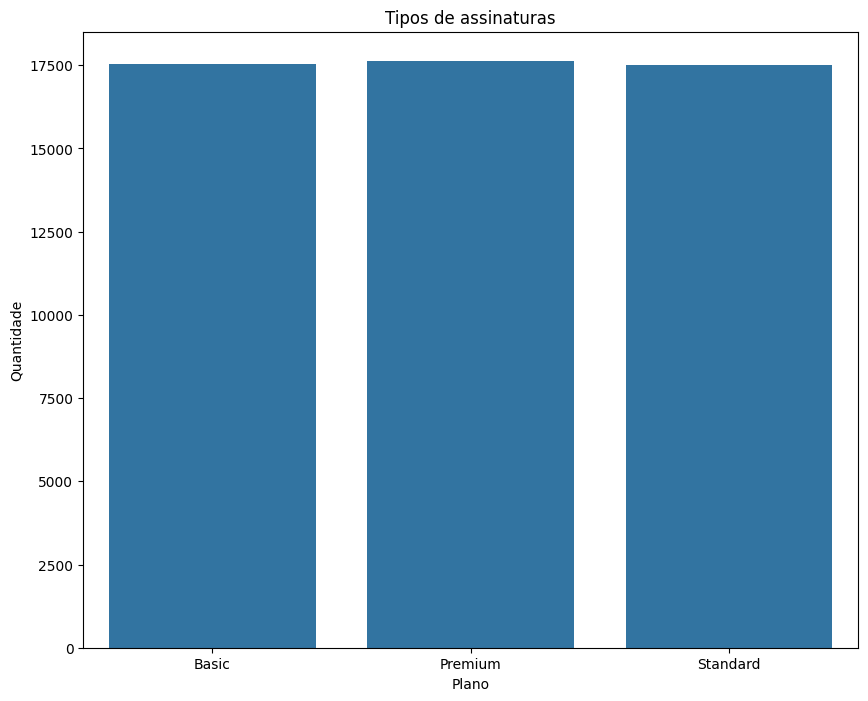

In [ ]:
#Quantidade de assinaturas
print('--------------------Quantidade de assinaturas-----------------\n')
plt.figure(figsize=[10,8])
sns.barplot(data=streaming_calc, x='Subscription_type', y='User_id')
plt.ylabel('Quantidade')
plt.xlabel('Plano')
plt.title('Tipos de assinaturas')

In [ ]:
#Classificação de assinatura
print('--------------------Genero-----------------------\n')
streaming_gender = streaming.groupby('Gender')['User_id'].count().reset_index()
streaming_gender = pd.DataFrame(streaming_gender)
streaming_gender

--------------------Genero-----------------------



,Gender,User_id
0,Female,31572
1,Male,31796


--------------------quantidade de assinaturas-----------------



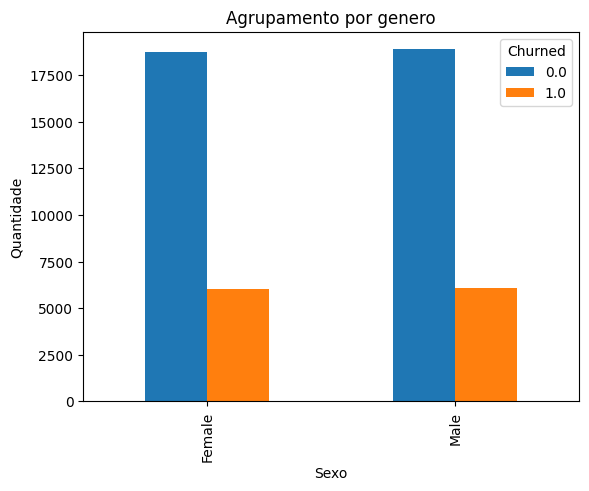

In [ ]:
#Quantidade de assinaturas
print('--------------------quantidade de assinaturas-----------------\n')

grouped = streaming.groupby(['Gender', 'Churned']).count()['User_id']

grouped.unstack().plot(kind='bar', stacked=False)

plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.title('Agrupamento por genero')

plt.show()

In [ ]:
#Tratando valores NaN
streaming['Time_on_platform'].fillna(0, inplace=True)
streaming['Num_streaming_services'].fillna(0, inplace=True)
streaming['Churned'].fillna(0, inplace=True)
streaming['Avg_rating'].fillna(0, inplace=True)
streaming['Devices_connected'].fillna(0, inplace=True)

In [ ]:
#Removendo colunas nulas
streaming.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [ ]:
#Proporção de valores nulos
print('--------------------Valores nulos-----------------------\n')
display(streaming.isnull().mean()*100)
print('-------------------Data shape-------------------\n')
display(streaming.shape)

--------------------Valores nulos-----------------------



,0
Age,0.0
Gender,0.0
Time_on_platform,0.0
Devices_connected,0.0
Subscription_type,0.0
Num_streaming_services,0.0
Num_active_profiles,0.0
Avg_rating,0.0
Churned,0.0
User_id,0.0


-------------------Data shape-------------------



(36515, 10)

In [ ]:
#Convertendo binario em Yes No
streaming['Churned'].replace({0: 'No', 1: 'Yes'}, inplace=True)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [ ]:
#convertendo o CustomerID para INT e a data para datetime
streaming['Time_on_platform'] = streaming['Time_on_platform'].astype(int)
streaming['Age'] = streaming['Age'].astype(int)
streaming['Num_streaming_services'] = streaming['Num_streaming_services'].astype(int)
streaming['Avg_rating'] = streaming['Avg_rating'].astype(int)
streaming['Devices_connected'] = streaming['Devices_connected'].astype(int)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


--------------------Quantidade de Churned-----------------



Text(0.5, 1.0, 'Foi Churned')

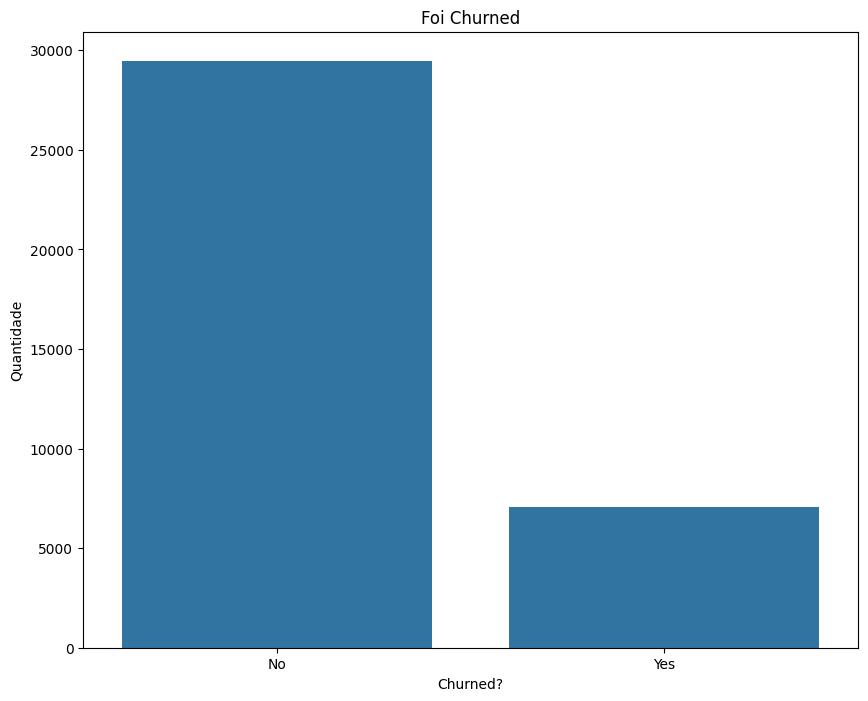

In [ ]:
#Quantidade de Churned
print('--------------------Quantidade de Churned-----------------\n')
plt.figure(figsize=[10,8])
sns.countplot(x='Churned', data=streaming)
plt.ylabel('Quantidade')
plt.xlabel('Churned?')
plt.title('Foi Churned')

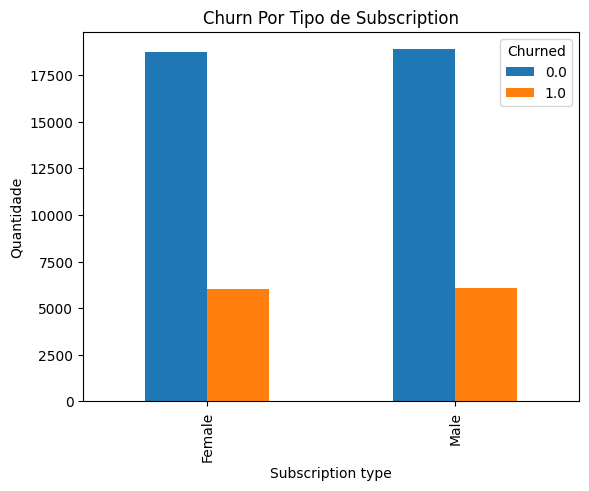

In [ ]:
streaming_assinatura = streaming.groupby(['Subscription_type', 'Churned']).count()['User_id']

grouped.unstack().plot(kind='bar', stacked=False)

plt.xlabel('Subscription type')
plt.ylabel('Quantidade')
plt.title('Churn Por Tipo de Subscription')

plt.show()

In [ ]:
#Definindo X e y
X = streaming.drop(['User_id', 'Churned'], axis=1)

y = streaming[['Churned']]

In [ ]:
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

In [ ]:
#Convertendo variaveis objeto em numerica
le = LabelEncoder()
streaming['Gender'] = le.fit_transform(streaming['Gender'])
streaming['Subscription_type'] = le.fit_transform(streaming['Subscription_type'])
streaming['Churned'] = le.fit_transform(streaming['Churned'])
streaming['User_id'] = le.fit_transform(streaming['User_id'])

In [ ]:
X = pd.get_dummies(X)

In [ ]:
#Instantiate a Min-Max scaling object
scaler = MinMaxScaler()
#Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
#Armazenando as previsões e os melhores hiperparâmetros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [ ]:
model = LogisticRegression()
lr = model.fit(X_train, y_train)

In [ ]:
#Fazendo previsões no conjunto de teste
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Armazenando as previsões e os melhores hiperparâmetros
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
14627,1.000000,0.739240,0.4,0.0,0.00,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
14274,0.627451,0.580317,0.0,0.0,1.00,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
796,0.725490,0.685581,0.2,0.0,0.75,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
24450,0.098039,0.328805,0.0,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
15373,0.941176,0.431784,0.2,0.0,0.75,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18219,0.254902,0.369220,0.4,0.0,0.50,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
32150,0.137255,0.000000,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
30700,0.882353,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
8768,0.215686,0.140541,0.2,0.0,0.50,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

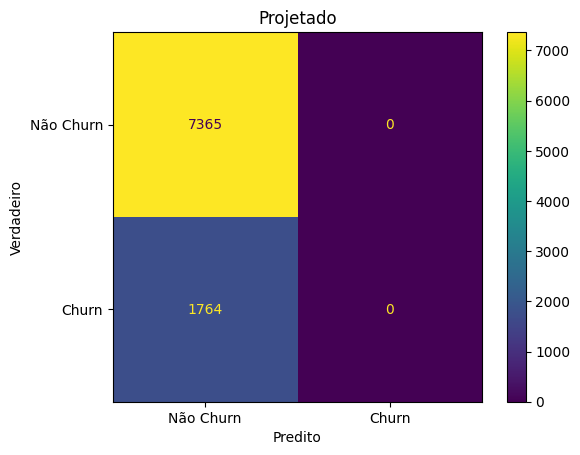

In [ ]:
#Previsão no conjunto de teste
print('--------------------Previsão-----------------\n')
y_pred = lr.predict(X_test)

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

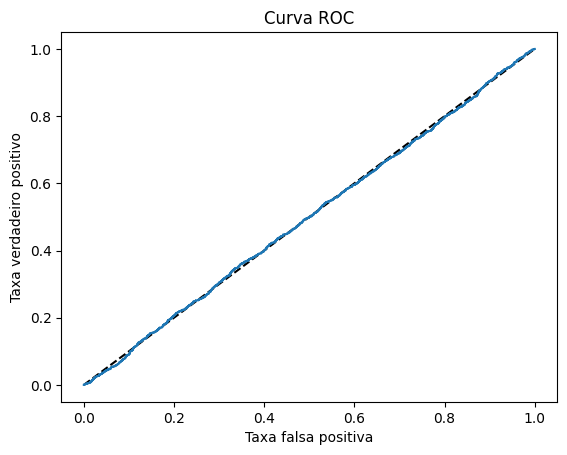

In [ ]:
#Predizendo probabilidade: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

#Gerando Valores ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [ ]:
print('Abaixo estão os resultados de treino e teste \n' )

print(f'Acurácia de (Treino): {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia de (Teste): {accuracy_score(y_test, lr.predict(X_test))}\n')
print('--------------------Acurácia-----------------')
print(f'Acurácia Balanceada de (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada de (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}\n')
print('--------------------Acurácia Balanceada-----------------')
print(f'Precision de (Treino): {precision_score(y_train, lr.predict(X_train))}')
print(f'Precision de (Teste): {precision_score(y_test, lr.predict(X_test))}\n')
print('--------------------Recall-----------------')
print(f'Recall de (Treino): {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall de (Teste): {recall_score(y_test, lr.predict(X_test))}\n')
print('--------------------F1-Score-----------------')
print(f'F1-Score de (Treino): {f1_score(y_train, lr.predict(X_train))}')
print(f'F1-Score de (Teste): {f1_score(y_test, lr.predict(X_test))}\n')
print('--------------------ROCAUC-----------------')
print(f'ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}')

Abaixo estão os resultados de treino e teste 

Acurácia de (Treino): 0.8067625794201416
Acurácia de (Teste): 0.8067696352283931

--------------------Acurácia-----------------
Acurácia Balanceada de (Treino): 0.5
Acurácia Balanceada de (Teste): 0.5

--------------------Acurácia Balanceada-----------------
Precision de (Treino): 0.0
Precision de (Teste): 0.0

--------------------Recall-----------------
Recall de (Treino): 0.0
Recall de (Teste): 0.0

--------------------F1-Score-----------------
F1-Score de (Treino): 0.0
F1-Score de (Teste): 0.0

--------------------ROCAUC-----------------
ROCAUC (Treino): 0.5148146728391526
ROCAUC (Teste): 0.4988340006742683


In [ ]:
rf =  RandomForestClassifier()

In [ ]:
#Fazendo treinamento
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Fazendo previsões no conjunto de teste
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Armazenando as previsões e os melhores hiperparâmetros
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
14627,1.000000,0.739240,0.4,0.0,0.00,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
14274,0.627451,0.580317,0.0,0.0,1.00,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
796,0.725490,0.685581,0.2,0.0,0.75,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
24450,0.098039,0.328805,0.0,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
15373,0.941176,0.431784,0.2,0.0,0.75,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18219,0.254902,0.369220,0.4,0.0,0.50,0.8,0.0,1.0,0.0,0.0,1.0,NaN,0
32150,0.137255,0.000000,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
30700,0.882353,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
8768,0.215686,0.140541,0.2,0.0,0.50,0.8,1.0,0.0,0.0,1.0,0.0,NaN,0


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

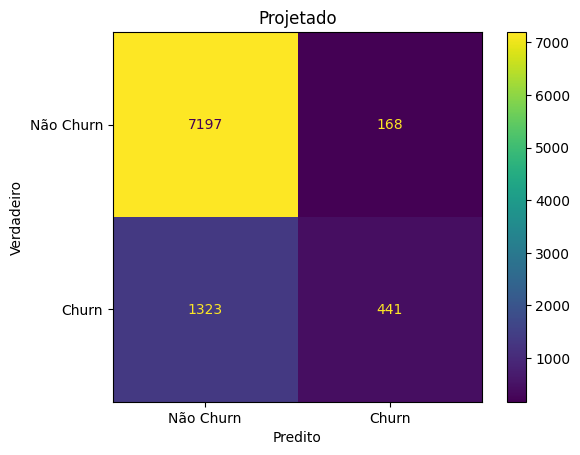

In [ ]:
#Previsão no conjunto de teste
print('--------------------Previsão-----------------\n')
y_pred = rf.predict(X_test)

# Crie a matriz de confusão e a exiba
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

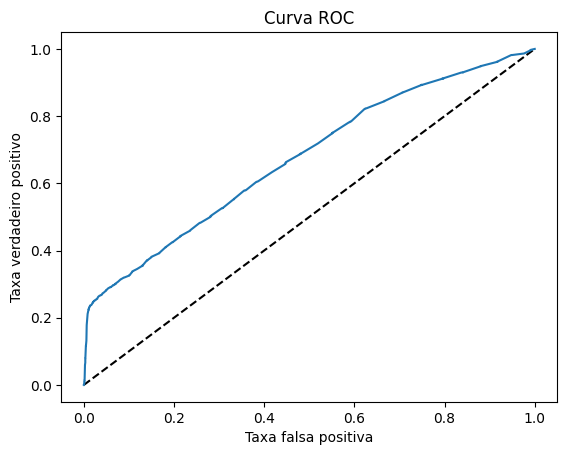

In [ ]:
#Predizendo probabilidade: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

#Gerando Valores ROC: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot Curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [ ]:
#GridSearchCV
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
#Fazendo treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
dict = grid_search.best_estimator_.get_params()

In [ ]:
rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [ ]:
rf_tunned.fit(X_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.